In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay,  make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, mean_absolute_error

In [2]:
df = pd.read_csv('asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [4]:
df.set_index('PatientID', inplace = True)

In [5]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [6]:
df.drop(['DoctorInCharge'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 5034 to 7425
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   in

In [7]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
PollutionExposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964


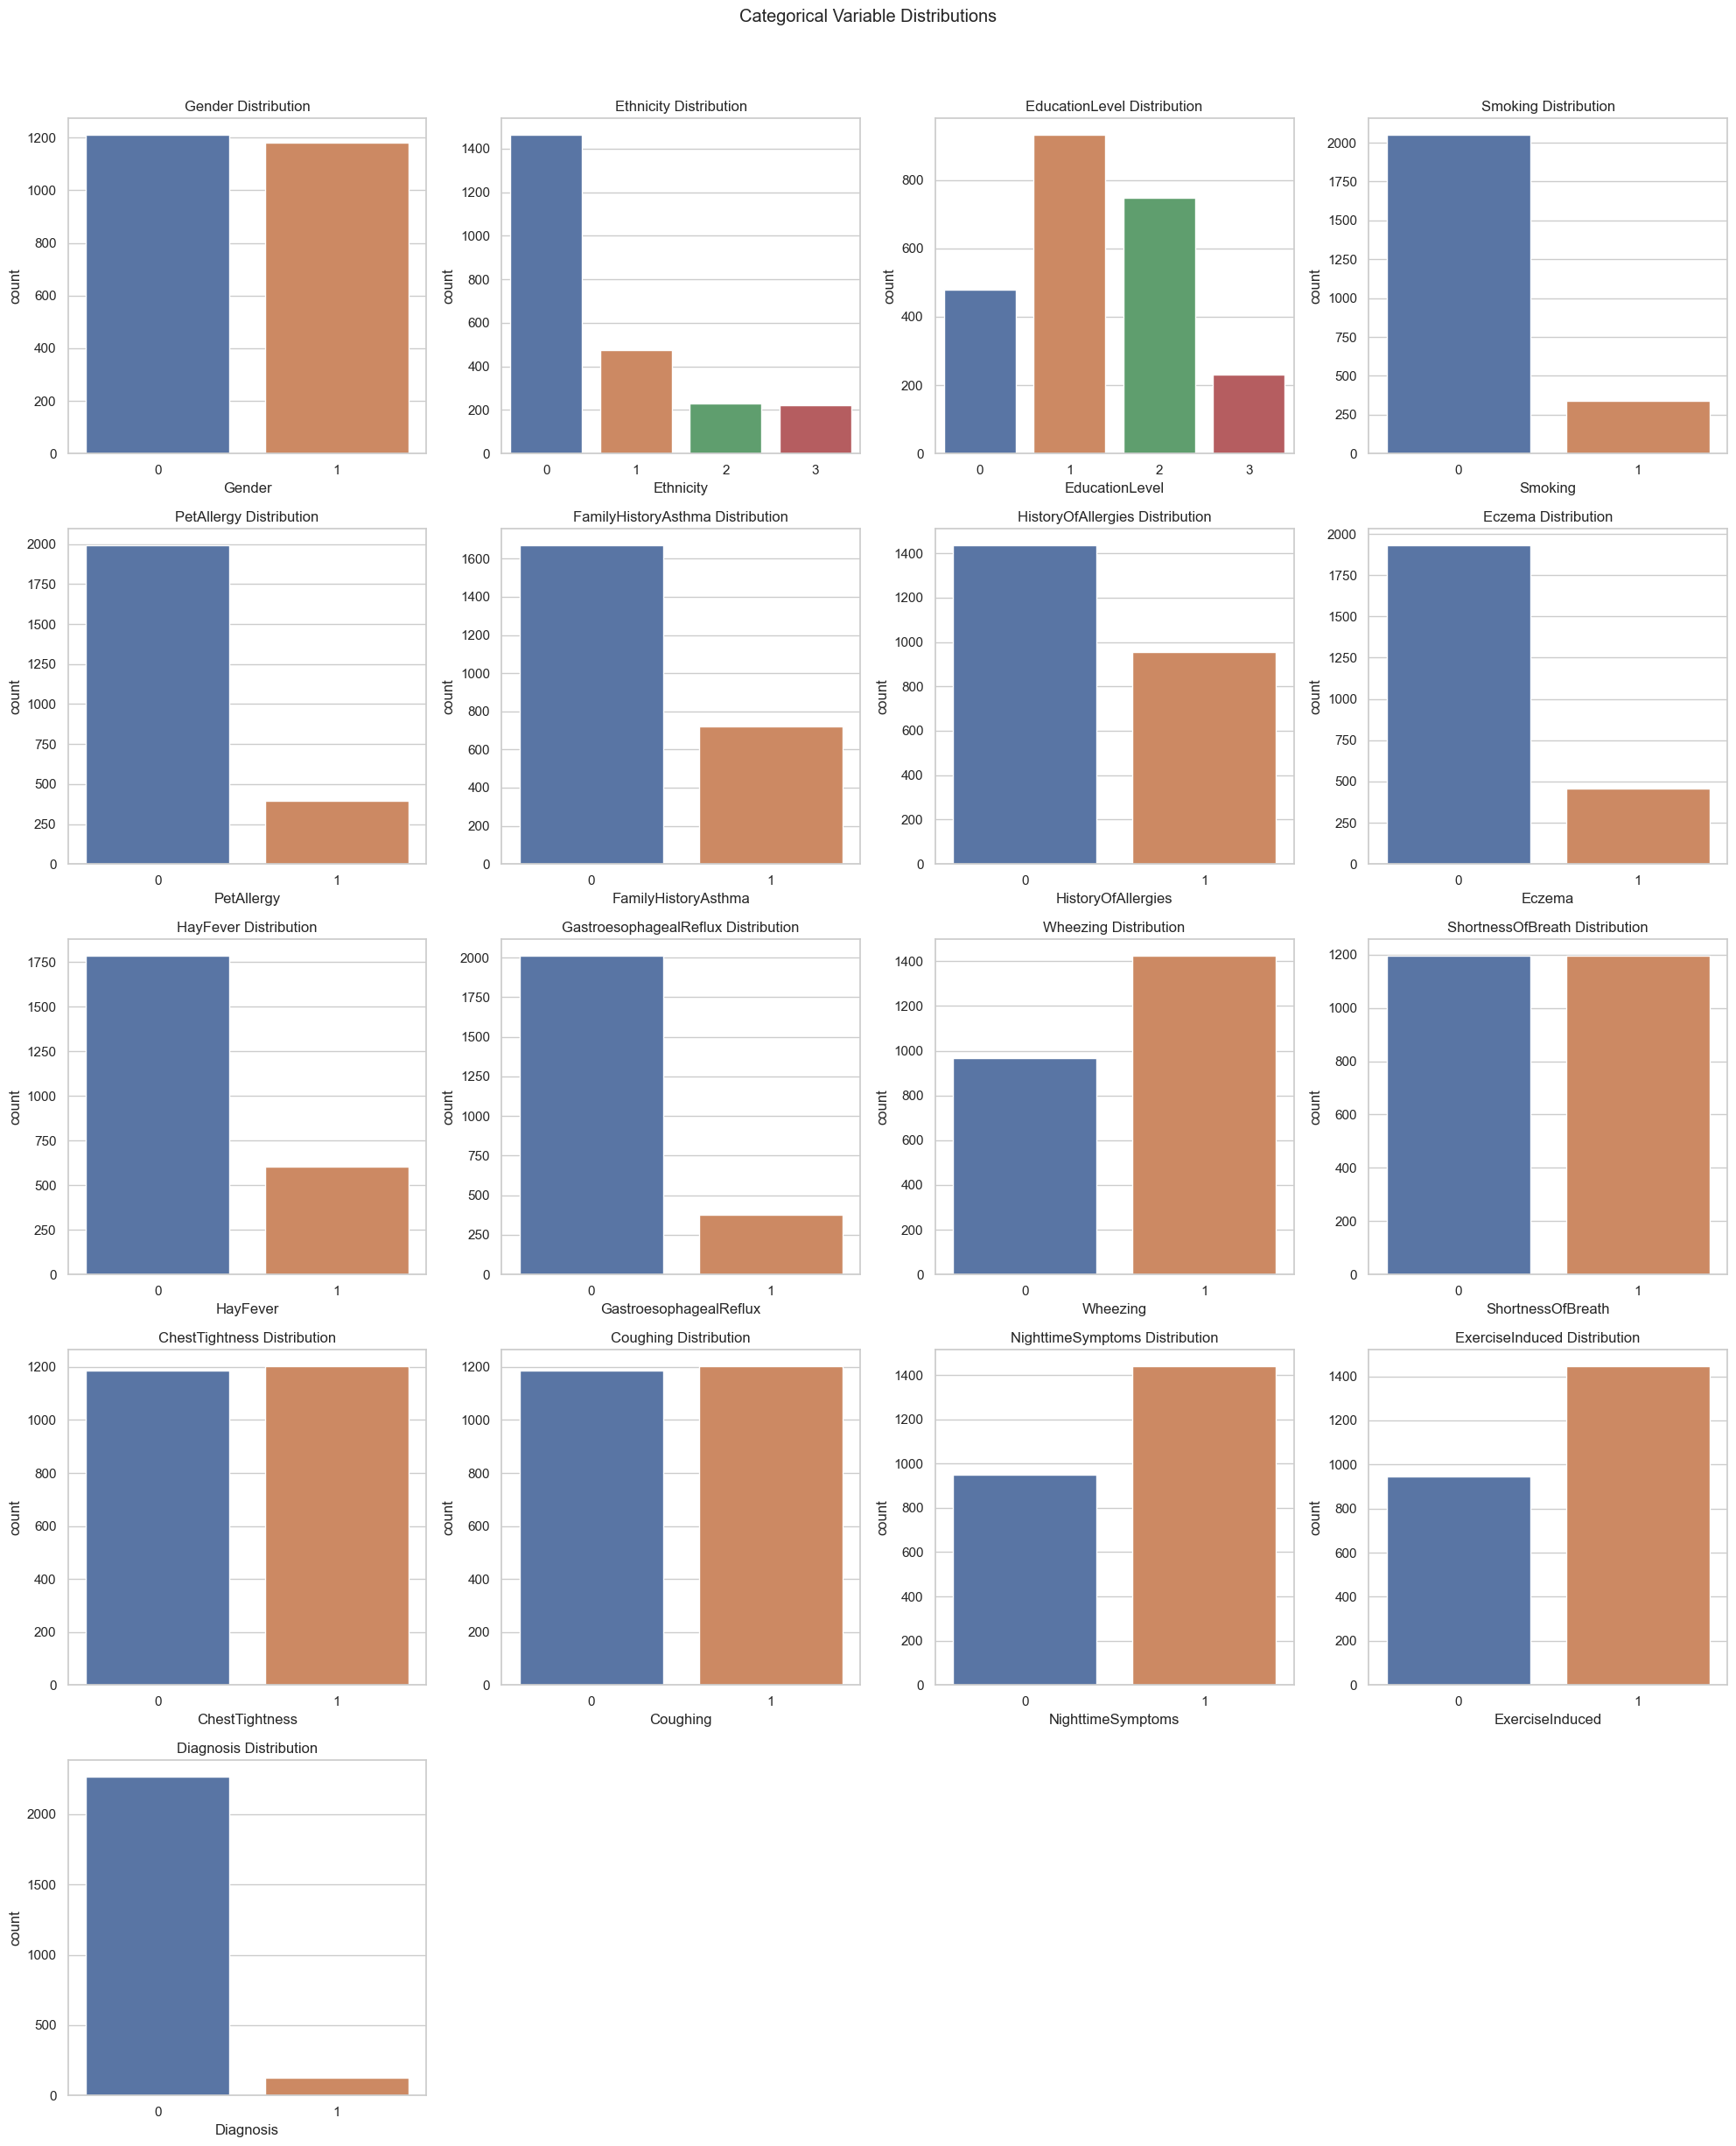

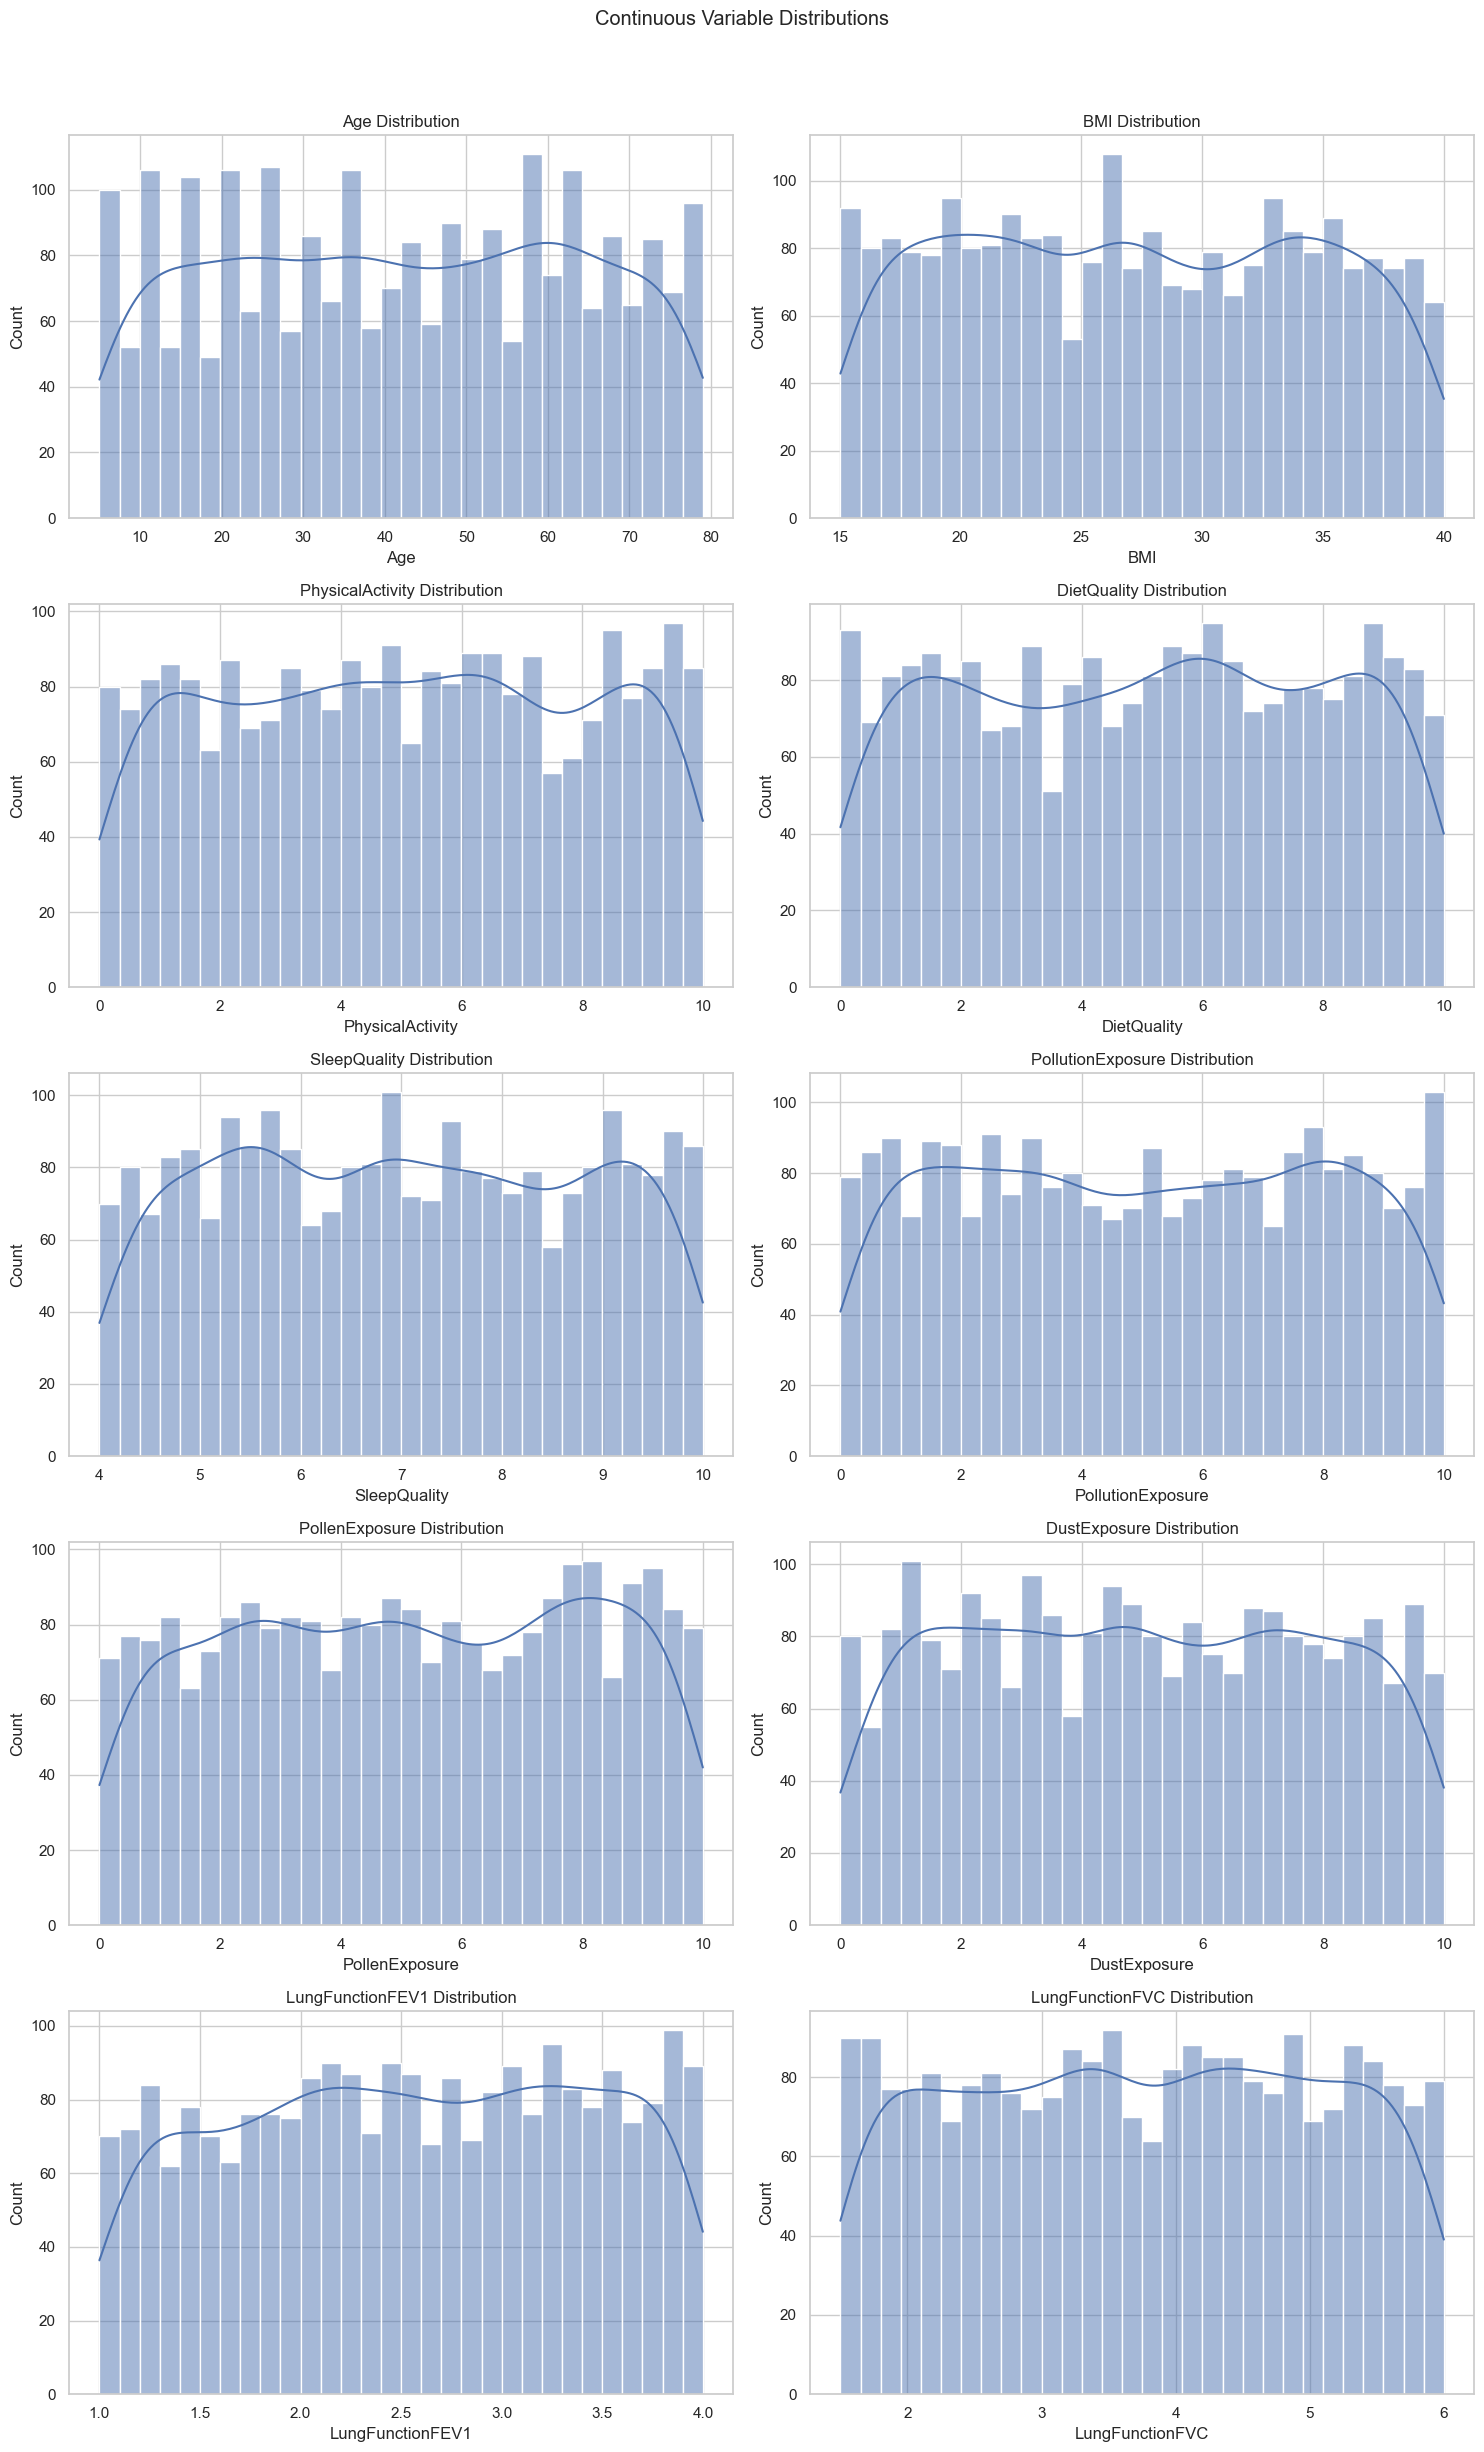

In [9]:

sns.set(style="whitegrid")

categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
    'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
    'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness',
    'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'
]

continuous_columns = [
    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 
    'LungFunctionFVC'
]

# Plotting Categorical Variables using Bar Plots
num_categorical = len(categorical_columns)
categorical_cols_per_row = 4  
num_rows = (num_categorical + categorical_cols_per_row - 1) // categorical_cols_per_row  

fig, axes = plt.subplots(num_rows, categorical_cols_per_row, figsize=(20, 5 * num_rows))  # Dynamic subplot grid
fig.suptitle('Categorical Variable Distributions')

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plotting Continuous Variables using Histograms
num_continuous = len(continuous_columns)
continuous_cols_per_row = 2  # Number of columns per row
num_rows = (num_continuous + continuous_cols_per_row - 1) // continuous_cols_per_row  # Calculate rows needed

fig, axes = plt.subplots(num_rows, continuous_cols_per_row, figsize=(15, 5 * num_rows))  # Dynamic subplot grid
fig.suptitle('Continuous Variable Distributions')

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [10]:
column_list = df.columns

In [11]:
for col in column_list:
    print(f'{col} Skewness {df[col].skew()}')

Age Skewness -0.011792077850088015
Gender Skewness 0.026775040691134414
Ethnicity Skewness 1.2824104491786292
EducationLevel Skewness 0.16129482957729072
BMI Skewness 0.02695261535837955
Smoking Skewness 2.0558383753604725
PhysicalActivity Skewness -0.010023668322366024
DietQuality Skewness -0.03265458836569731
SleepQuality Skewness 0.017700629093025534
PollutionExposure Skewness 0.005214481101220262
PollenExposure Skewness -0.04114584480537843
DustExposure Skewness 0.016467032297969014
PetAllergy Skewness 1.796728870870855
FamilyHistoryAsthma Skewness 0.8682105091206153
HistoryOfAllergies Skewness 0.4117081300502162
Eczema Skewness 1.5658411011641826
HayFever Skewness 1.1349518646632348
GastroesophagealReflux Skewness 1.8762043609370265
LungFunctionFEV1 Skewness -0.05914572311450667
LungFunctionFVC Skewness -0.015280166280452642
Wheezing Skewness -0.3921768740003461
ShortnessOfBreath Skewness -0.0016732908745174908
ChestTightness Skewness -0.013386621793962395
Coughing Skewness -0.013

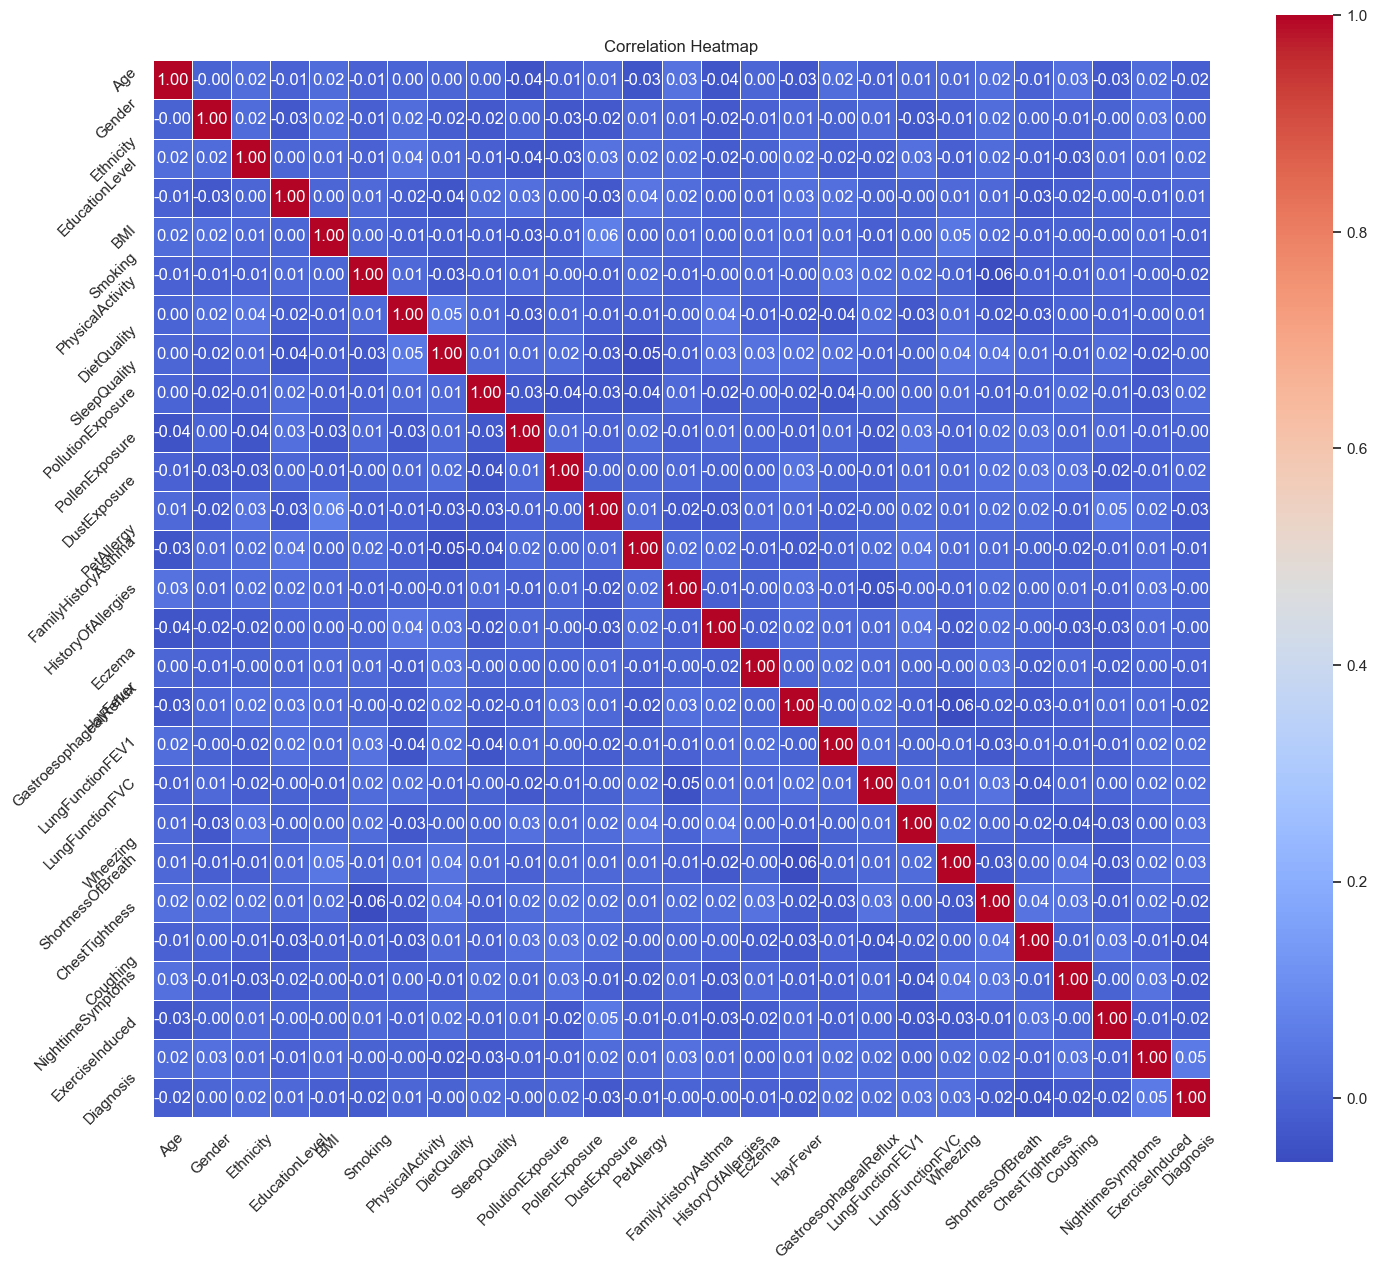

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


In [13]:
continuous_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
                      'PollutionExposure', 'LungFunctionFEV1', 'LungFunctionFVC']

robust_scaler = RobustScaler()
df_robust_scaled = df.copy()
df_robust_scaled[continuous_columns] = robust_scaler.fit_transform(df[continuous_columns])

print("Robust Scaled Data:")
print(df_robust_scaled[continuous_columns].head())


Robust Scaled Data:
                Age       BMI  PhysicalActivity  DietQuality  SleepQuality  \
PatientID                                                                    
5034       0.552632 -0.890040         -0.830817     0.073024      0.569653   
5035      -0.421053 -0.341222          0.177442     0.239748     -0.601586   
5036       0.394737 -0.687725          0.347142     0.798262     -0.044641   
5037      -0.052632  0.910665         -0.728023     0.139109     -0.899075   
5038       0.500000 -0.617148         -0.083111    -0.388941      0.875022   

           PollutionExposure  LungFunctionFEV1  LungFunctionFVC  
PatientID                                                        
5034                0.452520         -0.806240         0.534524  
5035               -0.590032         -0.242021        -0.900718  
5036               -0.688012         -0.582273         0.570572  
5037               -0.857072          0.325979        -0.635825  
5038               -0.780310         

In [14]:
valid_Set = df_robust_scaled.iloc[0:100]
df_robust_scaled.drop(df_robust_scaled.iloc[0:100].index, inplace = True)

In [15]:
df_robust_scaled.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
5134,-0.526316,1,3,1,-0.658010,0,0.016084,-0.642910,0.619337,0.548375,...,0,-0.446102,0.754864,0,1,1,1,0,1,0
5135,-0.368421,1,0,2,-0.706545,0,-0.875335,0.692177,0.278991,-0.577535,...,1,-0.761268,-0.830507,1,0,1,0,1,0,0
5136,-0.289474,1,1,1,-0.675397,0,0.890552,-0.587508,0.300362,-0.478364,...,0,0.771286,-0.956343,1,0,1,0,0,1,0
5137,-0.605263,0,0,1,-0.437551,0,0.942661,0.869200,-0.163169,0.588524,...,0,-0.916838,0.267048,1,0,0,0,1,0,0
5138,0.684211,1,0,1,0.717585,0,0.961078,-0.632227,0.704070,0.149952,...,0,0.829507,0.266238,1,0,0,1,1,1,0


In [16]:
P = df_robust_scaled['Diagnosis']
X = df_robust_scaled.drop(['Diagnosis'], axis = 1)

## over sampling

<Axes: xlabel='Diagnosis', ylabel='count'>

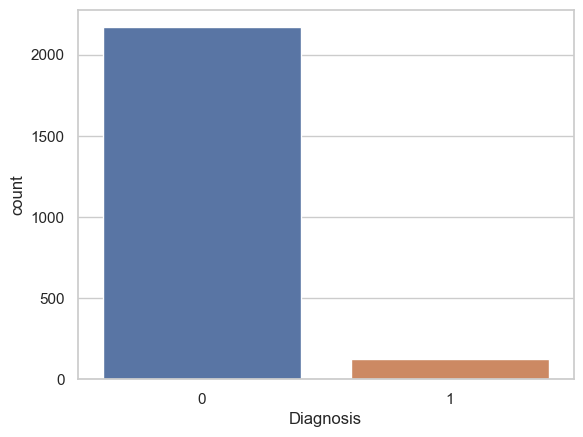

In [17]:
sns.countplot(x = P, data = df)

In [18]:
P.value_counts()

Diagnosis
0    2168
1     124
Name: count, dtype: int64

In [19]:
x_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X ,P)
print(y_resampled.value_counts())

Diagnosis
0    2168
1    2168
Name: count, dtype: int64


# Models 

In [20]:
def print_metrics(model):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'mae': make_scorer(mean_absolute_error)
        }

    # Evaluate final model using cross-validation
    scores = cross_validate(model, x_resampled, y_resampled, scoring=scoring, n_jobs = -1)
    cross_val_scores = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring = 'accuracy', n_jobs = -1)
    test_res = cross_val_predict(model,x_resampled, y_resampled, n_jobs = -1)

    # Print Cross-validation scores
    print(f"Cross-validation Score: {100*cross_val_scores.mean():.2f}")
    print(f"Cross-validation Accuracy: {100*np.mean(scores['test_accuracy']):.2f}")
    print(f"Cross-validation Precision: {100*np.mean(scores['test_precision']):.2f}")
    print(f"Cross-validation Recall: {100*np.mean(scores['test_recall']):.2f}")
    print(f"Cross-validation F1 Score: {100*np.mean(scores['test_f1']):.2f}")
    print(f"Cross-validation MAE: {100*np.mean(scores['test_mae']):.2f}")

    cf = confusion_matrix(y_resampled,test_res)
    cf_plot = ConfusionMatrixDisplay(cf)

    cf_plot.plot()
    plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.25)

lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
res = lr.predict(x_train)
accuracy_score(res, y_train)

0.8330258302583026

Cross-validation Score: 82.54
Cross-validation Accuracy: 82.54
Cross-validation Precision: 82.87
Cross-validation Recall: 82.54
Cross-validation F1 Score: 82.49
Cross-validation MAE: 17.46


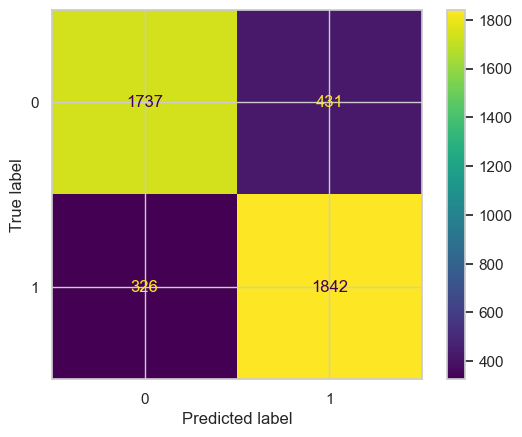

In [22]:
lr = LogisticRegression(max_iter = 1000)
print_metrics(lr)

Cross-validation Score: 86.56
Cross-validation Accuracy: 86.56
Cross-validation Precision: 87.05
Cross-validation Recall: 86.56
Cross-validation F1 Score: 86.51
Cross-validation MAE: 13.44


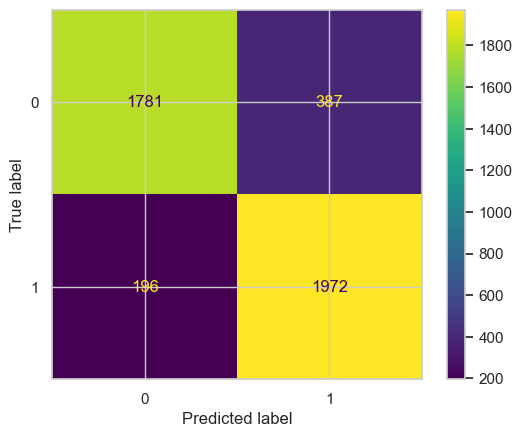

In [23]:
dtc = DecisionTreeClassifier(random_state = 42)
print_metrics(dtc)

Cross-validation Score: 95.85
Cross-validation Accuracy: 95.83
Cross-validation Precision: 95.94
Cross-validation Recall: 95.83
Cross-validation F1 Score: 95.82
Cross-validation MAE: 4.17


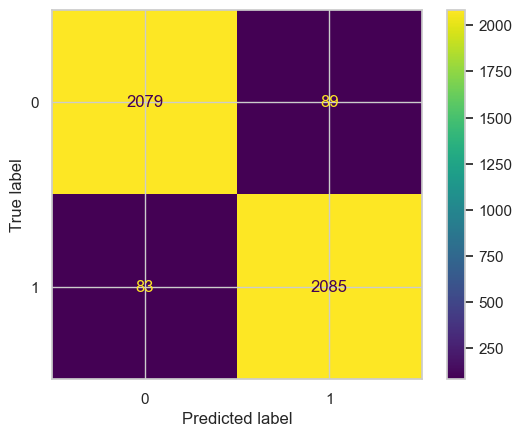

In [24]:
rf = RandomForestClassifier()
print_metrics(rf)

Cross-validation Score: 79.01
Cross-validation Accuracy: 79.01
Cross-validation Precision: 85.22
Cross-validation Recall: 79.01
Cross-validation F1 Score: 78.04
Cross-validation MAE: 20.99


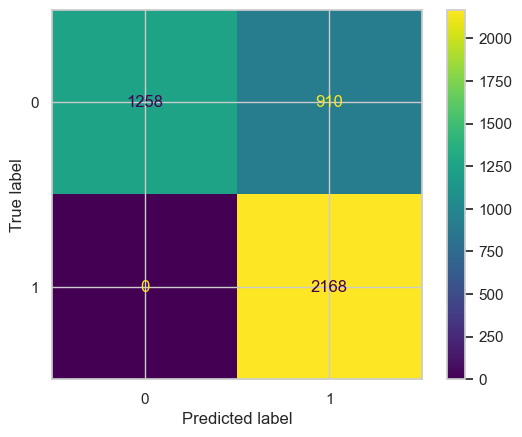

In [25]:
knn = KNeighborsClassifier()
print_metrics(knn)

Cross-validation Score: 83.21
Cross-validation Accuracy: 83.21
Cross-validation Precision: 83.60
Cross-validation Recall: 83.21
Cross-validation F1 Score: 83.15
Cross-validation MAE: 16.79


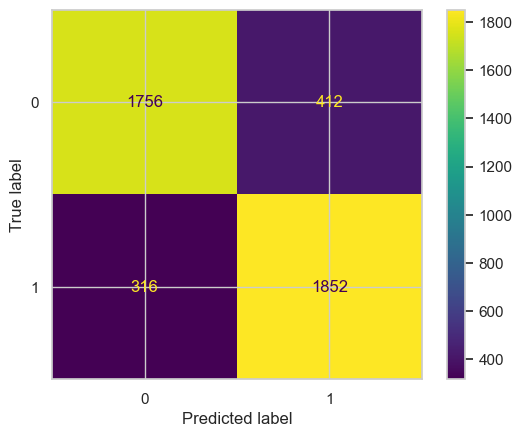

In [26]:
svc = SVC(kernel = 'linear', probability = True)
print_metrics(svc)

Cross-validation Score: 93.91
Cross-validation Accuracy: 94.24
Cross-validation Precision: 94.52
Cross-validation Recall: 94.24
Cross-validation F1 Score: 94.22
Cross-validation MAE: 5.76


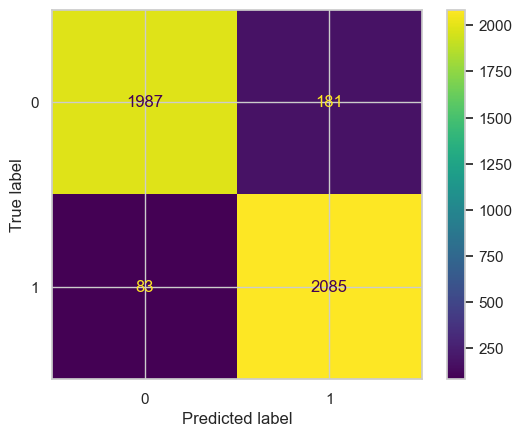

In [27]:
mlp = MLPClassifier(max_iter = 1000)
print_metrics(mlp)

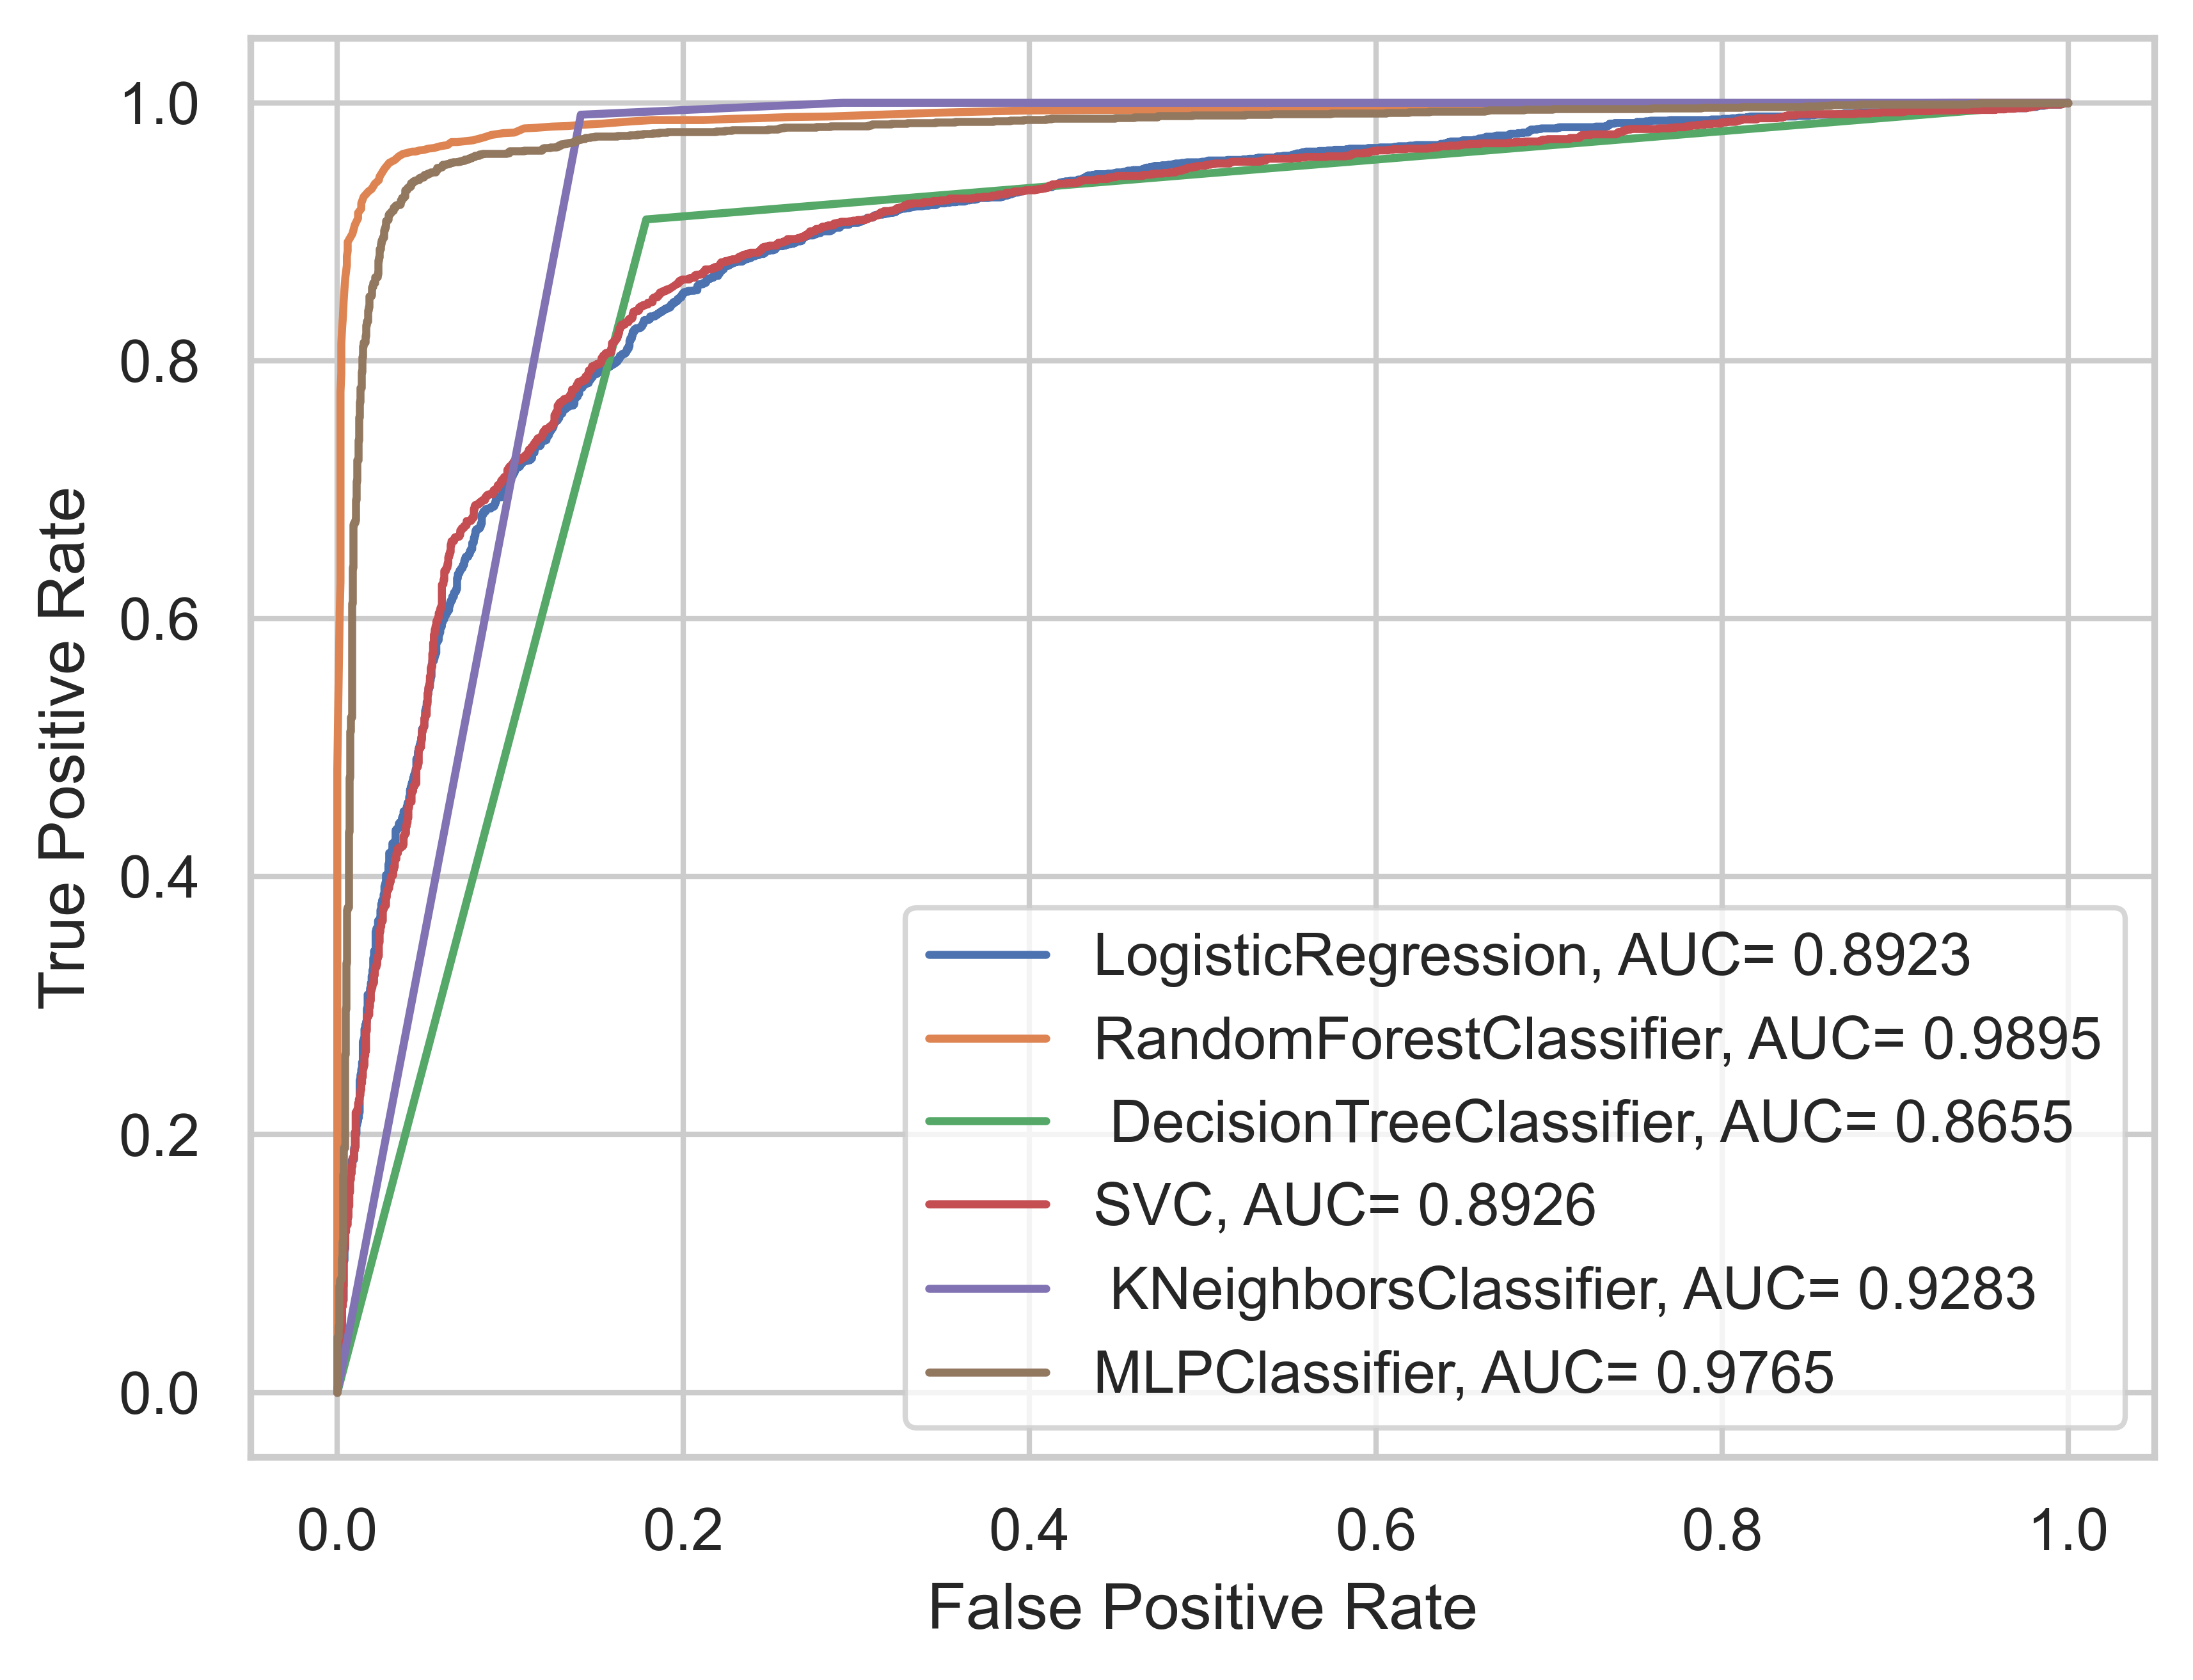

In [30]:
#set up plotting area
plt.figure(0, dpi = 600 ).clf()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#logistic regression model
def plot_roc(model, X, P, label) :
    test_res = cross_val_predict(model, X, P, method='predict_proba', n_jobs = -1)[:,1]
    fpr, tpr, _ = metrics.roc_curve(P, test_res)
    auc = round(metrics.roc_auc_score(P, test_res), 4)
    plt.plot(fpr,tpr,label=f"{label}, AUC= {auc}")

plot_roc(lr, x_resampled, y_resampled, "LogisticRegression")
plot_roc(rf, x_resampled, y_resampled, "RandomForestClassifier")
plot_roc(dtc, x_resampled, y_resampled, " DecisionTreeClassifier")
plot_roc(svc, x_resampled, y_resampled, "SVC")
plot_roc(knn,x_resampled, y_resampled, " KNeighborsClassifier")
plot_roc(mlp, x_resampled, y_resampled, "MLPClassifier")
plt.legend()

plt.savefig('asthma.png') 
plt.show()